In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the .csv dataset

data = pd.read_csv("temperature_data (1).csv")
data

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


In [24]:
# Understanding the features:

# ambient, coolant, pm, stator_yoke, stator_tooth, stator_winding - these 6 features are temperatures.
# u_d, u_q - these 2 are voltages.
# i_d, i_q - these 2 are currents.
# torque

# profile_id - is a unique identifier for each of measurement session.
# This can be considered as a categorical feature since the individual values are not actually numerical.

# motor_speed - speed of the motor. This is the target variable.

In [25]:
data['motor_speed'].unique()

array([-1.2224282, -1.2224293, -1.2224278, ..., -1.2217995, -1.2221036,
       -1.2221992])

In [26]:
data['motor_speed'].value_counts()

motor_speed
-1.222430    4836
-1.222430    4788
-1.222430    4723
-1.222430    4689
-1.222430    4680
             ... 
-0.625396       1
-0.621686       1
-0.618096       1
-0.614790       1
-1.222199       1
Name: count, Length: 490798, dtype: int64

In [27]:
data['profile_id'].unique()

array([ 4,  6, 10, 11, 20, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       72], dtype=int64)

In [28]:
data['profile_id'].value_counts()

profile_id
20    43970
6     40387
65    40093
66    36475
27    35360
4     33423
58    33381
56    33122
53    32441
79    31153
44    26340
70    25676
62    25599
30    23862
80    23823
74    23760
68    23330
36    22608
76    22187
48    21982
29    21357
32    20959
81    17671
45    17141
42    16919
73    16785
41    16699
63    16667
31    15586
69    15349
72    15300
10    15255
71    14655
77    14621
60    14542
61    14515
57    14402
75    13471
67    11134
49    10815
50    10809
54    10806
55    10806
78     8444
43     8442
11     7886
59     7474
51     6260
64     6249
52     3725
46     2179
47     2175
Name: count, dtype: int64

In [29]:
# Inspecting the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [30]:
#Checking for any missing values

data.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [31]:
#Checking for any duplicate rows

data.duplicated().sum()

0

In [32]:
#No missing values or duplicate rows

In [33]:
# Summary of the dataset.

data.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


# Visualization - Histplot

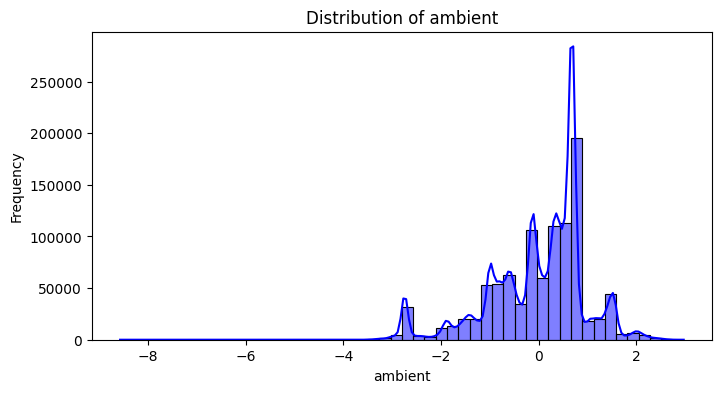

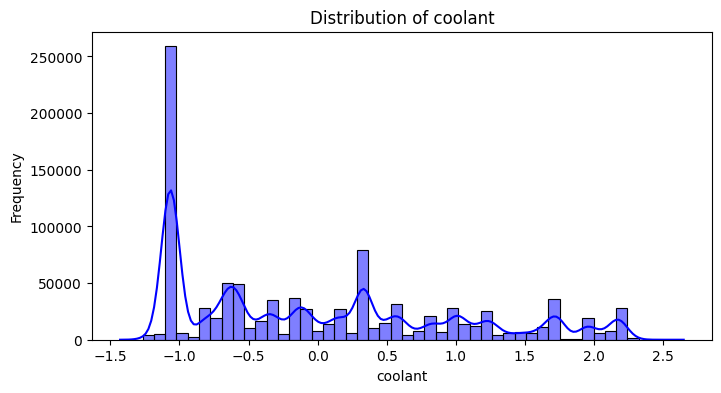

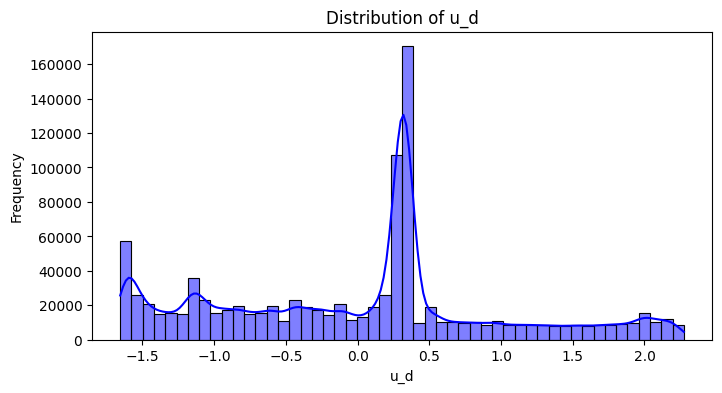

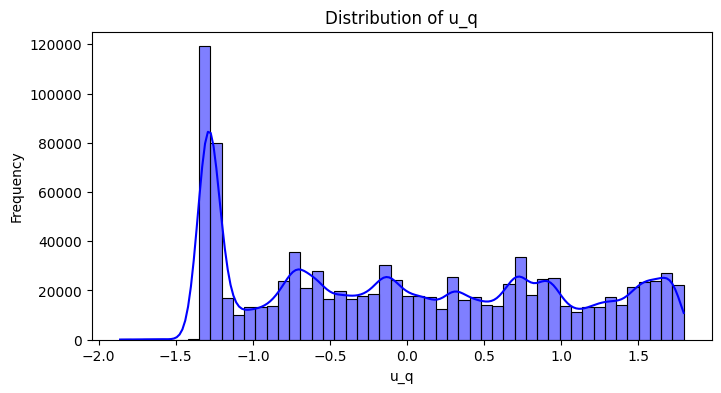

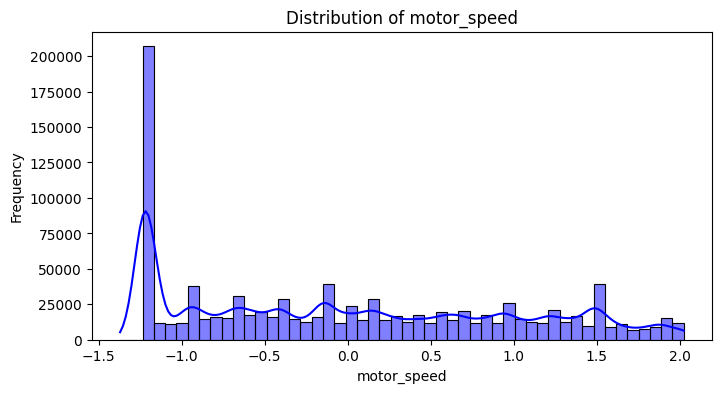

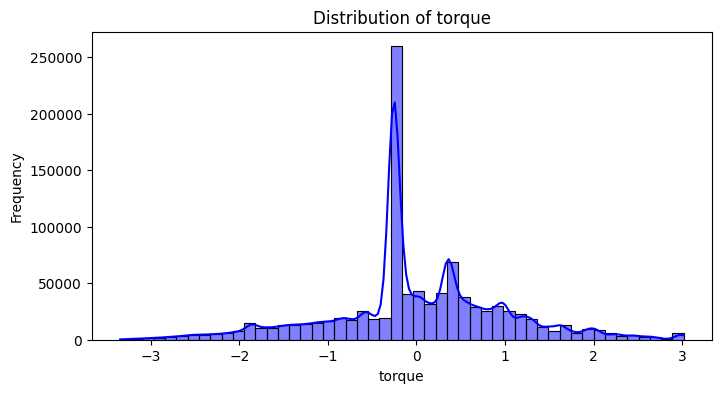

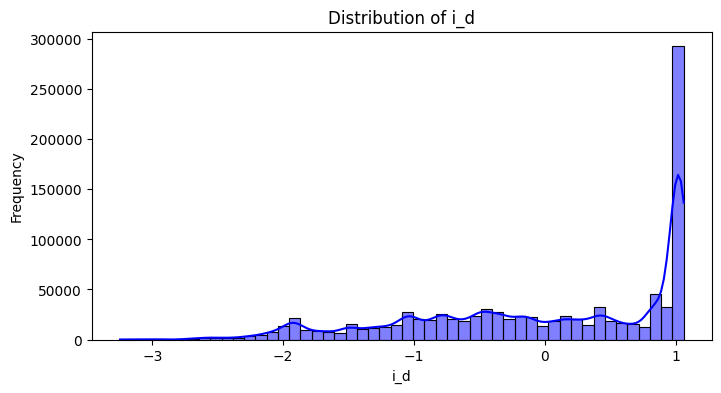

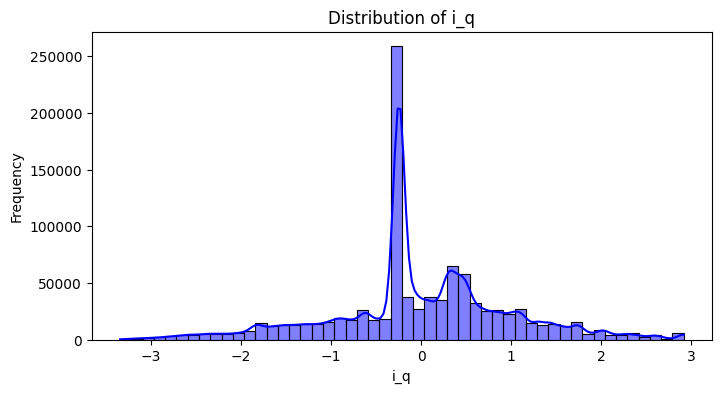

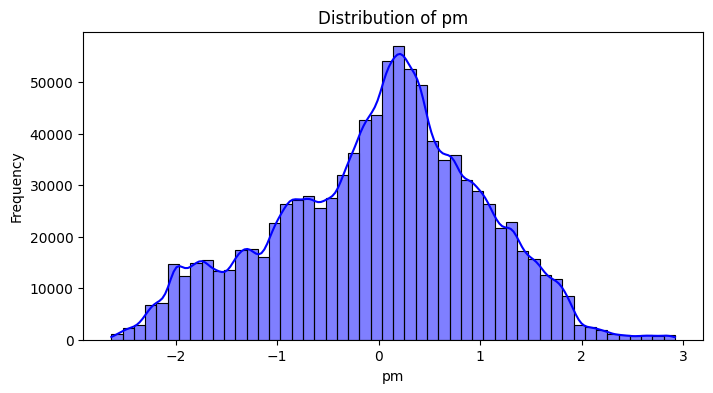

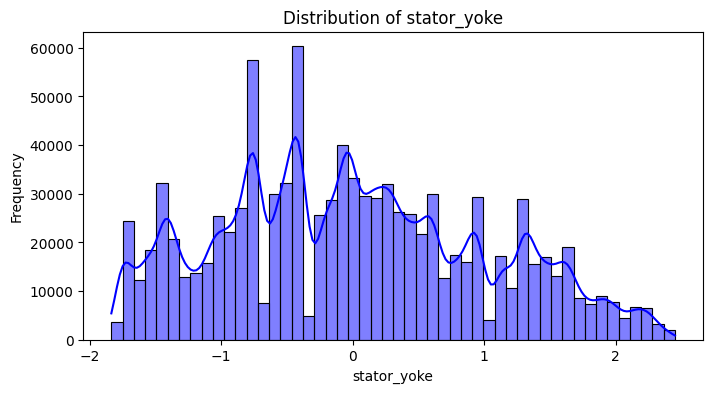

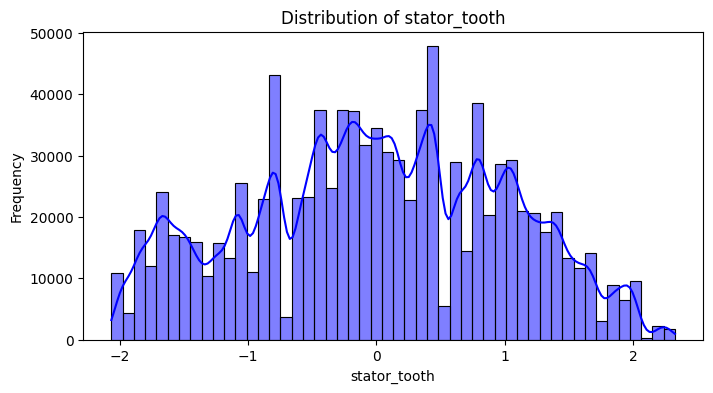

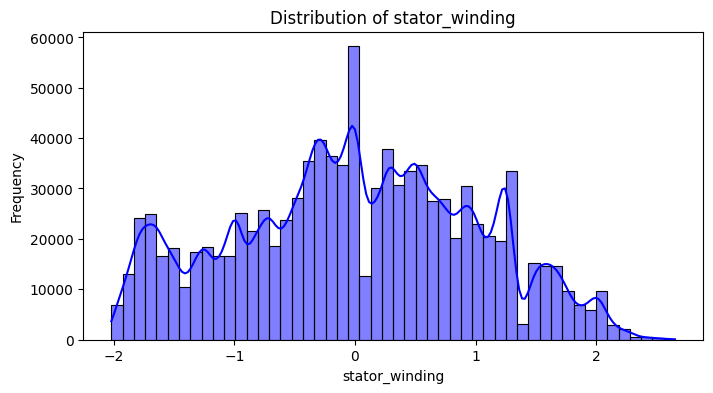

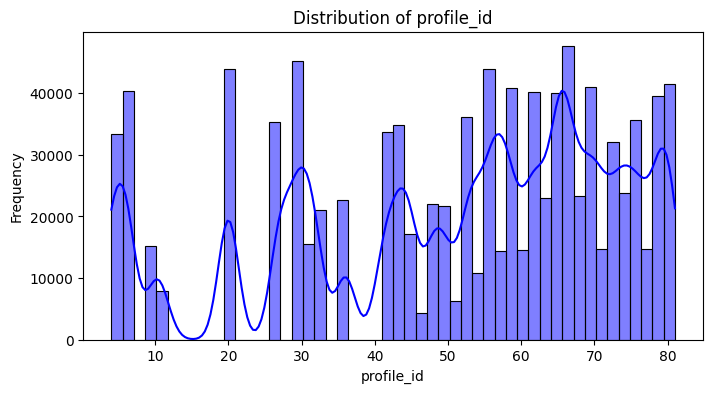

In [13]:
for feature in data:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=50, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualization - Heatmap

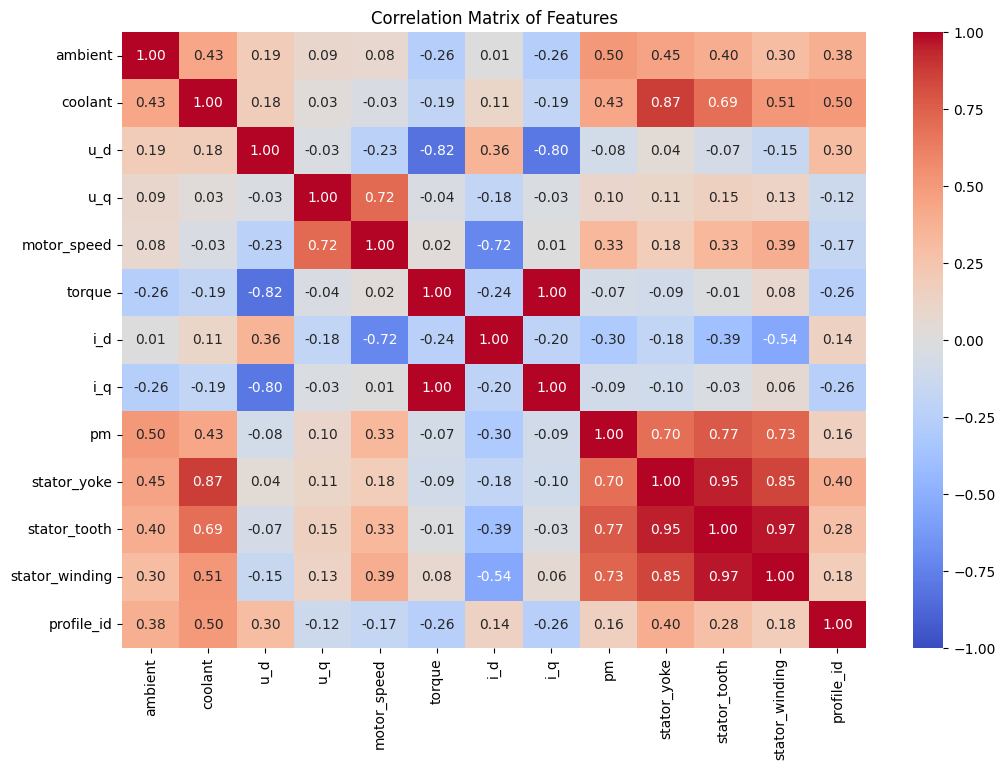

In [14]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

In [15]:
# Correlations of 'motor_speed' with other features, sorted by magnitude.

correlation_with_target = correlation_matrix["motor_speed"].sort_values(ascending=False)
correlation_with_target

motor_speed       1.000000
u_q               0.716897
stator_winding    0.393154
stator_tooth      0.333909
pm                0.332419
stator_yoke       0.182564
ambient           0.078283
torque            0.024517
i_q               0.006323
coolant          -0.033332
profile_id       -0.166225
u_d              -0.233828
i_d              -0.722914
Name: motor_speed, dtype: float64

In [16]:
# Correlations observations:

# 'u_q' is most positively correlated with 'motor_speed'
# 'i_d' is most negatively correlated with 'motor_speed'

# Visualization - Scatterplots between motor_speed and its highly correlated features 

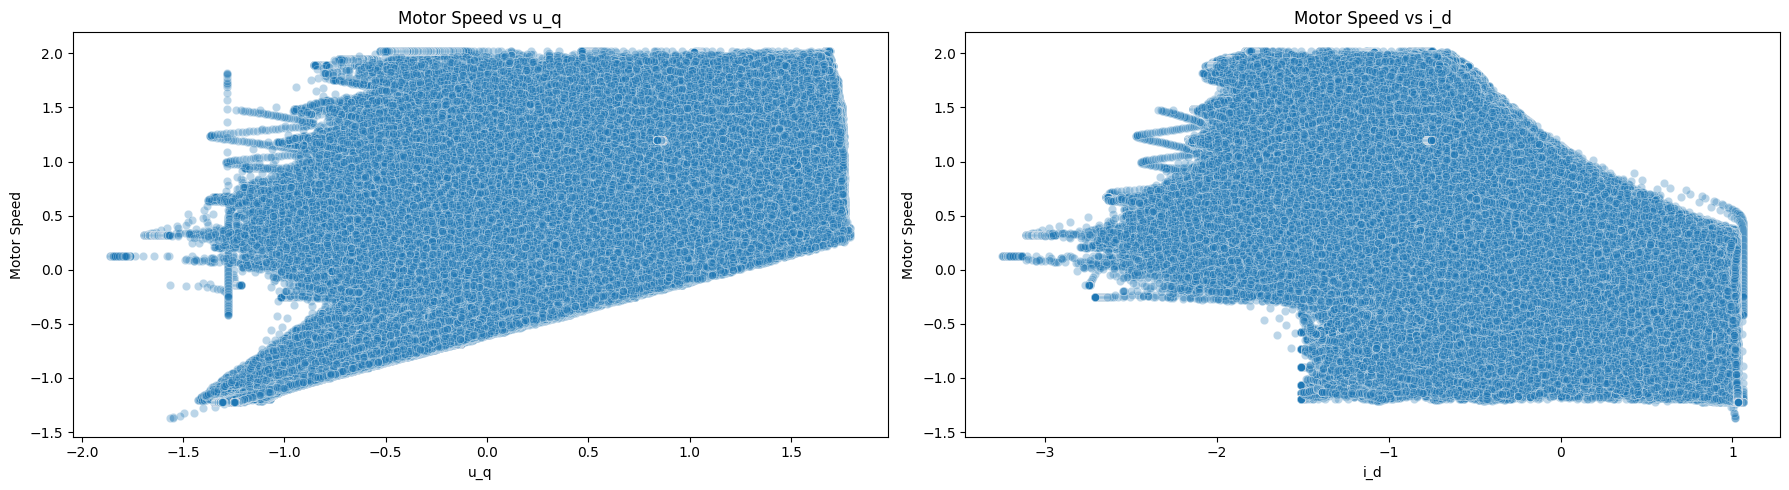

In [17]:
# Considering only 'u_q' and 'i_d' since they are the most influential

correlated_features = ['u_q', 'i_d']
plt.figure(figsize=(18, 5))

for i, feature in enumerate(correlated_features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=data[feature], y=data['motor_speed'], alpha=0.3)
    plt.title(f"Motor Speed vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Motor Speed")

plt.tight_layout()
plt.show()

# Visualization - Boxplot of motor_speed across different profile_id sessions

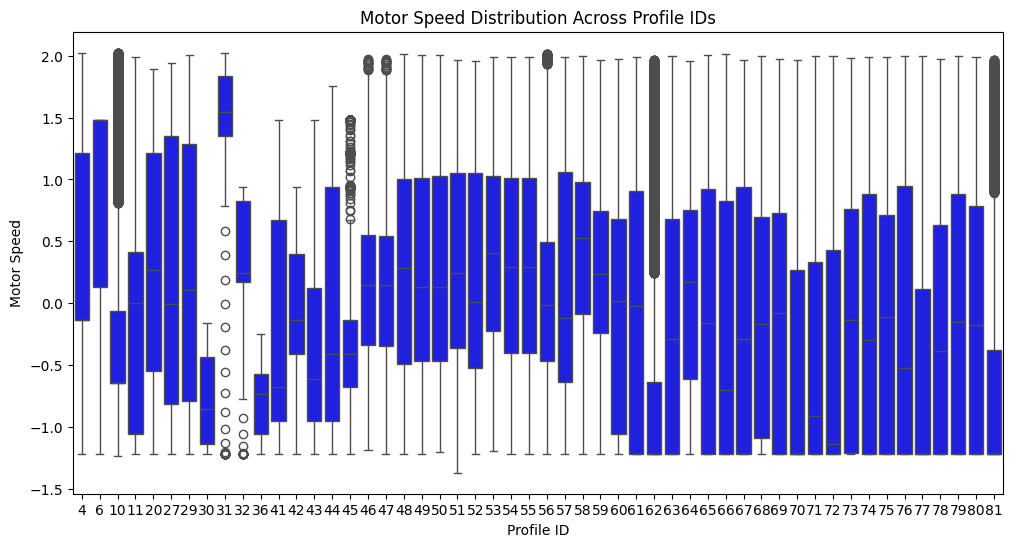

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='profile_id', y='motor_speed', data=data, color='blue')

plt.title("Motor Speed Distribution Across Profile IDs")
plt.xlabel("Profile ID")
plt.ylabel("Motor Speed")
plt.show()

# Visualization - Boxplot to look for Outliers

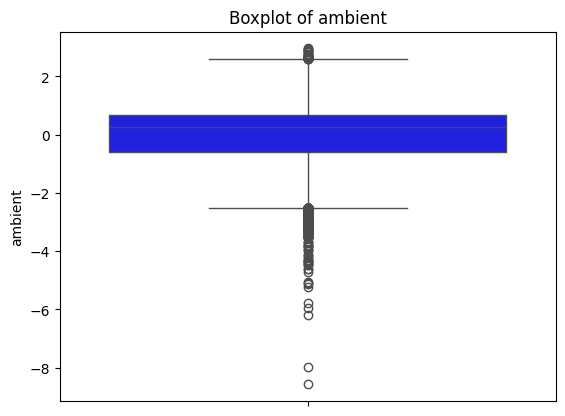

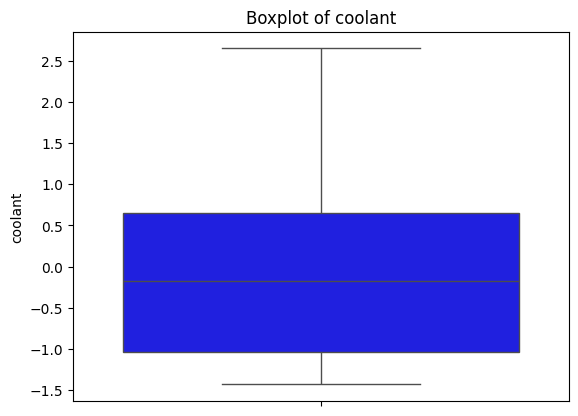

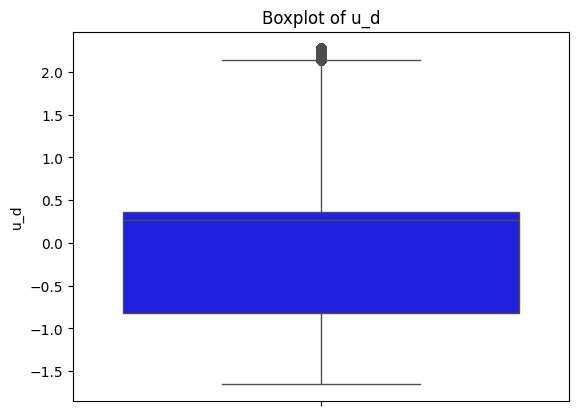

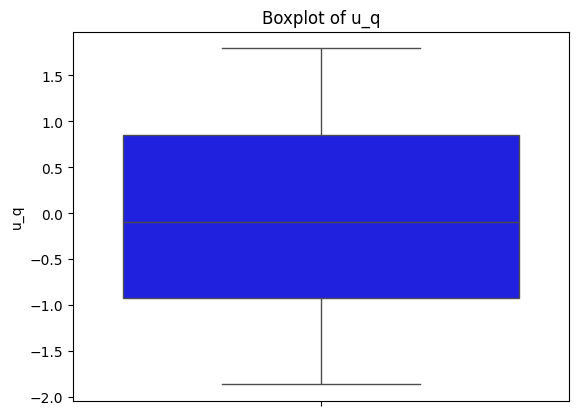

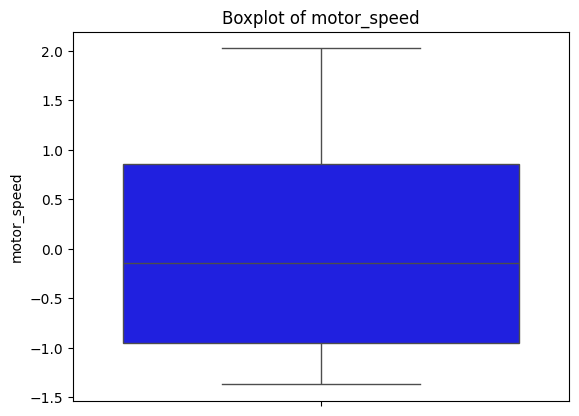

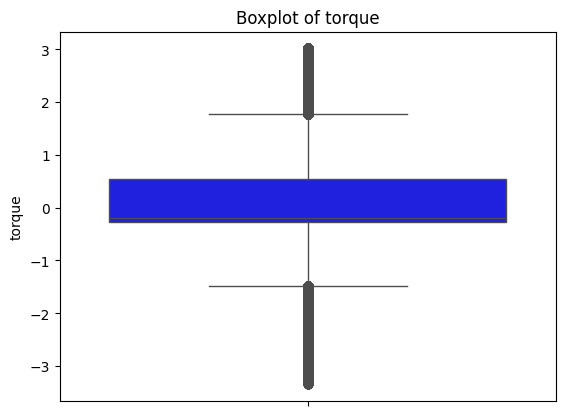

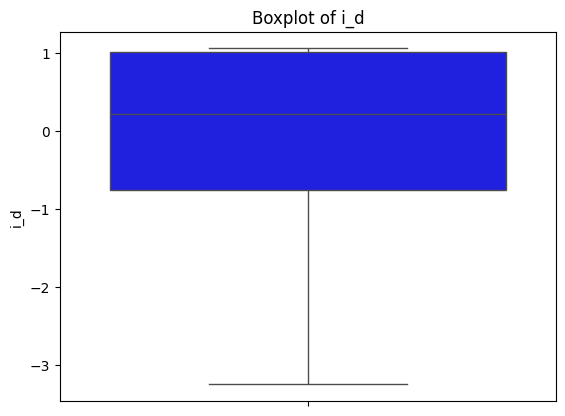

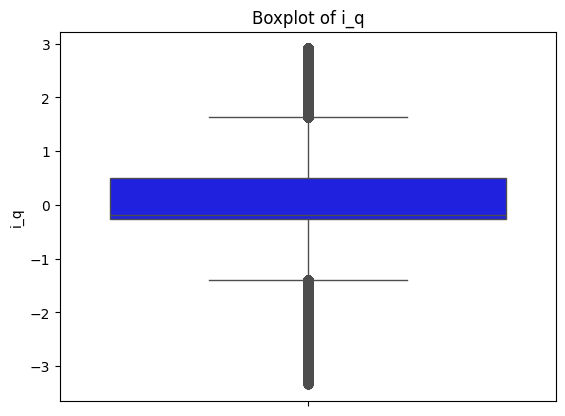

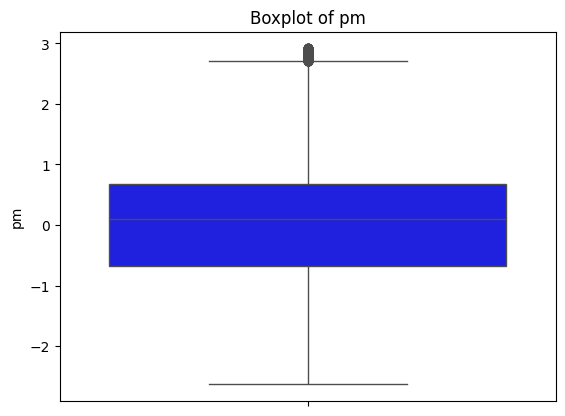

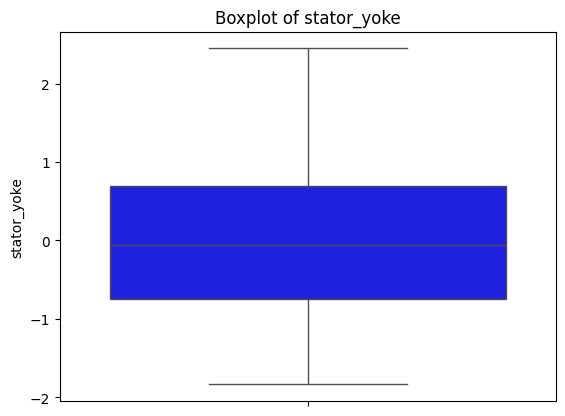

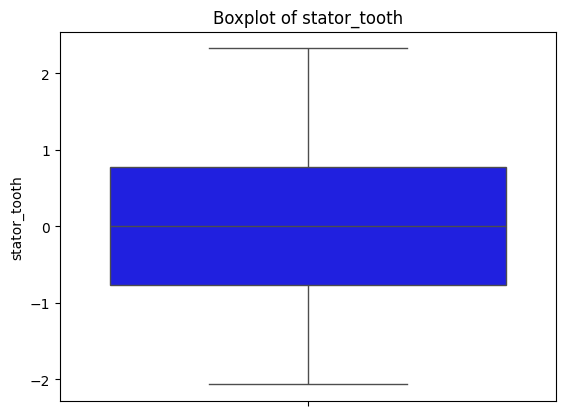

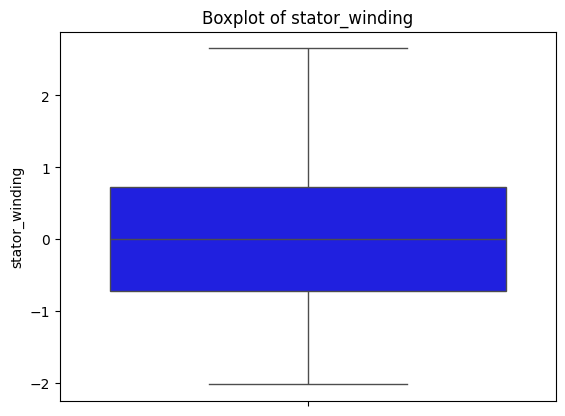

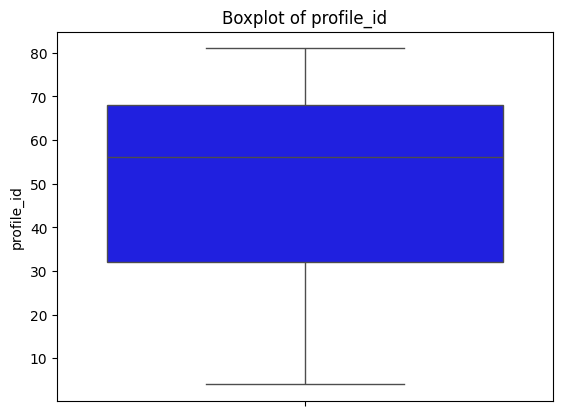

In [19]:
for feature in data.columns:
    plt.figure()
    sns.boxplot(y=data[feature], color='blue')
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
    plt.show()

In [20]:
# Checking for outliers 

for feature in data:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

outliers

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id


# Separating features and target variable

In [3]:
x = data.drop(columns=['motor_speed', 'profile_id'])
y = data['motor_speed']

In [4]:
# Each measurement session has a unique 'profile_id'.
# We are not supposed to estimate from one session onto the other as they are strongly independent.
# Need to split the data based on 'profile_id'.

unique_profiles = data['profile_id'].unique()
unique_profiles

array([ 4,  6, 10, 11, 20, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       72], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

train_profiles, test_profiles = train_test_split(unique_profiles, test_size=0.2, random_state=42)

In [6]:
train_profiles

array([31, 56, 29, 64, 20, 67, 54, 75, 63, 80, 45, 32, 46, 60, 66, 55, 41,
        4, 77, 57, 61, 69, 59, 76,  6, 51, 10, 70, 65, 53, 79, 36, 52, 48,
       72, 50, 30, 73, 44, 58, 68], dtype=int64)

In [7]:
test_profiles

array([49, 71, 78, 42, 74, 27, 47, 81, 11, 62, 43], dtype=int64)

In [8]:
x

,ambient,coolant,u_d,u_q,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725
998066,-0.048839,0.320022,0.331701,-1.250655,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279
998067,-0.042350,0.307415,0.330946,-1.246852,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666
998068,-0.039433,0.302082,0.330987,-1.249505,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581


In [9]:
y

0        -1.222428
1        -1.222429
2        -1.222428
3        -1.222430
4        -1.222429
            ...   
998065   -1.222428
998066   -1.222437
998067   -1.222430
998068   -1.222432
998069   -1.222431
Name: motor_speed, Length: 998070, dtype: float64

In [10]:
# Create training and test sets.

x_train = x[data['profile_id'].isin(train_profiles)]
y_train = y[data['profile_id'].isin(train_profiles)]

x_test = x[data['profile_id'].isin(test_profiles)]
y_test = y[data['profile_id'].isin(test_profiles)]

# For x_train, only those rows from x that belong to the 'profile_id's listed in 'train_profiles' are taken.
# For y_train, those from y are taken.

# Same process for x_test and y_test.

# Data Transformation - Scaling

In [11]:
# Scaling the features using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
# Check the shape of the processed data

x_train_scaled.shape, x_test_scaled.shape, y_train.shape, y_test.shape

((826344, 11), (171726, 11), (826344,), (171726,))

# Data Modelling

# 1. Linear Regression Model

In [44]:
# Import the Linear Regression model

from sklearn.linear_model import LinearRegression

In [45]:
# Initialize the model

linear_model = LinearRegression()

In [46]:
# Train the model on the training set

linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [47]:
# Predict on the testing set

y_pred_linear = linear_model.predict(x_test_scaled)

In [48]:
# Evaluate the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

metrics = {
    "MAE": mae_linear,
    "MSE": mse_linear,
    "RMSE": rmse_linear,
    "R2": r2_linear }

metrics

{'MAE': 0.2068690703791537,
 'MSE': 0.07513176405679987,
 'RMSE': 0.2741017403388747,
 'R2': 0.9262756160507293}

# 2. Lasso Regression Model

In [15]:
# Import the Lasso Regression model
from sklearn.linear_model import Lasso

# Initialize the model
lasso_model = Lasso(alpha=0.1, random_state=42)

# Train the model on the training set
lasso_model.fit(x_train_scaled, y_train)

Lasso(alpha=0.1, random_state=42)

In [16]:
# Predict on the testing set
y_pred_lasso = lasso_model.predict(x_test_scaled)

In [50]:
# Evaluate the model

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mae_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

metrics = {
    "MAE": mae_lasso,
    "MSE": mse_lasso,
    "RMSE": rmse_lasso,
    "R2": r2_lasso }

metrics

{'MAE': 0.23024459815733223,
 'MSE': 0.13618642674855777,
 'RMSE': 0.479838095775369,
 'R2': 0.8663646389734782}

# 3. Ridge Regression Model

In [17]:
# Import the Ridge Regression model
from sklearn.linear_model import Ridge

# Initialize the model
ridge_model = Ridge(alpha=1, random_state=42)

# Train the model on the training set
ridge_model.fit(x_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [18]:
# Predict on the testing set
y_pred_ridge = ridge_model.predict(x_test_scaled)

In [52]:
# Evaluate the model

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mae_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

metrics = {
    "MAE": mae_ridge,
    "MSE": mse_ridge,
    "RMSE": rmse_ridge,
    "R2": r2_ridge }

metrics

{'MAE': 0.20687195997056057,
 'MSE': 0.07513533890033786,
 'RMSE': 0.4548317930516298,
 'R2': 0.9262721081717268}

# 4. Decision Tree Regressor

In [19]:
# Import the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dec_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
dec_tree_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
# Predict on the testing set
y_pred_dec_tree = dec_tree_model.predict(x_test_scaled)

In [54]:
# Evaluate the model

mse_dec_tree = mean_squared_error(y_test, y_pred_dec_tree)
mae_dec_tree = mean_absolute_error(y_test, y_pred_dec_tree)
rmse_dec_tree = np.sqrt(mae_dec_tree)
r2_dec_tree = r2_score(y_test, y_pred_dec_tree)

metrics = {
    "MAE": mse_dec_tree,
    "MSE": mae_dec_tree,
    "RMSE": rmse_dec_tree,
    "R2": r2_dec_tree }

metrics

{'MAE': 0.05434507237342668,
 'MSE': 0.04813743034443862,
 'RMSE': 0.21940243923994696,
 'R2': 0.9466729281322286}

# 5. Random Forest Regressor

In [21]:
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

In [13]:
# It's taking a long time for the code to run with the default value of n_estimators = 100.
# Reducing n_estimators (number of trees) to 20.
# Adding max_depth value to restrict the depth of each tree.
# Setting a higher value for min_samples_split.

In [22]:
# Initialize the model
forest_model = RandomForestRegressor(n_estimators=20, max_depth=10, min_samples_split=10, n_jobs=-1, random_state=42)

# Train the model on the training set
forest_model.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [23]:
# Predict on the testing set
y_pred_forest = forest_model.predict(x_test_scaled)

In [58]:
# Evaluate the model

mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mae_forest)
r2_forest = r2_score(y_test, y_pred_forest)

metrics = {
    "MAE": mse_forest,
    "MSE": mae_forest,
    "RMSE": rmse_forest,
    "R2": r2_forest }

metrics

{'MAE': 0.012558241864956363,
 'MSE': 0.03767519290746114,
 'RMSE': 0.1941009863639573,
 'R2': 0.9876770011112757}

# 6. Support Vector Regressor

In [24]:
# Import the Support Vector Regressor model
from sklearn.svm import SVR

In [14]:
# Code running endlessly with the default values of kernel='rbf', C=1.0, epsilon=0.1
# Switched to a 'linear' kernel, reduced C (regularization parameter) to 0.1 and increased epsilon to 0.2 but still didn't run.
# Taking the first 75K rows instead of the total 100K.

In [25]:
# Initialize the model
svr_model = SVR(kernel='linear', C=0.1, epsilon=0.2)

# Train the model on the training set
svr_model.fit(x_train_scaled[:75000], y_train[:75000])

SVR(C=0.1, epsilon=0.2, kernel='linear')

In [26]:
# Predict on the testing set
y_pred_svr = svr_model.predict(x_train_scaled[:75000])

In [62]:
# Evaluate the model

mse_svr = mean_squared_error(y_test[:75000], y_pred_svr)
mae_svr = mean_absolute_error(y_test[:75000], y_pred_svr)
rmse_svr = np.sqrt(mae_svr)
r2_svr = r2_score(y_test[:75000], y_pred_svr)

metrics = {
    "MAE": mse_svr,
    "MSE": mae_svr,
    "RMSE": rmse_svr,
    "R2": r2_svr }

metrics

{'MAE': 2.24460608916299,
 'MSE': 1.2839884057292066,
 'RMSE': 1.1331321219210082,
 'R2': -1.4327948566011566}

In [63]:
# Very poor performance on the subset

# 7. K-Nearest Neighbors (KNN) Regressor

In [27]:
# Import the K-Nearest Neighbors Regressor model
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training set
knn_model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [28]:
# Predict on the testing set
y_pred_knn = knn_model.predict(x_test_scaled)

In [65]:
# Evaluate the model

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mae_knn)
r2_knn = r2_score(y_test, y_pred_knn)

metrics = {
    "MAE": mse_knn,
    "MSE": mae_knn,
    "RMSE": rmse_knn,
    "R2": r2_knn }

metrics

{'MAE': 0.022254206228825322,
 'MSE': 0.08359244402689156,
 'RMSE': 0.2891235791610424,
 'R2': 0.9781626630880141}

# 8. Gradient Boosting Regressor

In [29]:
# Import the K-Nearest Neighbors Regressor model
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
# Code running endlessly with the default values of n_estimators='100', learning_rate=0.1, max_depth=3
# Reduced the number of trees to 50 but still didn't run.
# Further reduced to 25, increased learning_rate to 0.3 and reduced max_depth to 2

In [30]:
# Initialize the model
gbr_model = GradientBoostingRegressor(n_estimators=25, learning_rate=0.3, max_depth=2, random_state=42)

# Train the model on the training set
gbr_model.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=25,
                          random_state=42)

In [31]:
# Predict on the testing set
y_pred_gbr = gbr_model.predict(x_test_scaled)

In [73]:
# Evaluate the model

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mae_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

metrics = {
    "MAE": mse_gbr,
    "MSE": mae_gbr,
    "RMSE": rmse_gbr,
    "R2": r2_gbr }

metrics

{'MAE': 0.02409461018328479,
 'MSE': 0.10442160923073268,
 'RMSE': 0.32314332614295577,
 'R2': 0.976356733872007}

# 9. XGBoost Regressor

In [32]:
# Import the XGBoost Regressor model
import xgboost as xgb

In [33]:
# Initialize the model
xgboost_model = xgb.XGBRegressor(random_state=42)

# Train the model on the training set
xgboost_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
# Predict on the testing set
y_pred_xgboost = xgboost_model.predict(x_test_scaled)

In [76]:
# Evaluate the model

mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mae_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

metrics = {
    "MAE": mse_xgboost,
    "MSE": mae_xgboost,
    "RMSE": rmse_xgboost,
    "R2": r2_xgboost }

metrics

{'MAE': 0.037303213916605085,
 'MSE': 0.04155754652160625,
 'RMSE': 0.203856681326873,
 'R2': 0.9633955557964745}

# 10. Stacking Regressor

In [78]:
# Import the Stacking Regressor model
from sklearn.ensemble import StackingRegressor

In [79]:
# Define base models for Stacking
base_models = [
    ('knn', KNeighborsRegressor(n_neighbors=3)),
    ('random_forest', RandomForestRegressor(n_estimators=10, max_depth=10, min_samples_split=10, n_jobs=-1, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=15, learning_rate=0.3, max_depth=2, random_state=42))
]

# Define the final estimator
final_estimator = LinearRegression()

In [80]:
# Create the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator, n_jobs=-1)

In [81]:
# Train the model on the training set
stacking_model.fit(x_train_scaled, y_train)

StackingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=3)),
                              ('random_forest',
                               RandomForestRegressor(max_depth=10,
                                                     min_samples_split=10,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=42)),
                              ('gradient_boosting',
                               GradientBoostingRegressor(learning_rate=0.3,
                                                         max_depth=2,
                                                         n_estimators=15,
                                                         random_state=42))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [82]:
# Predict on the testing set
y_pred_stacking = stacking_model.predict(x_test_scaled)

In [83]:
# Evaluate the model

mse_stacking = mean_squared_error(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mae_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

metrics = {
    "MAE": mse_stacking,
    "MSE": mae_stacking,
    "RMSE": rmse_stacking,
    "R2": r2_stacking }

metrics

{'MAE': 0.007527108711983722,
 'MSE': 0.038060413015206004,
 'RMSE': 0.19509078147161646,
 'R2': 0.9926138902809382}

# 11. Neural Networks (Multi-layer Perception)

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [85]:
# Initialize the Sequential model and create the Input layer.
# The number of neurons in Input layer will be equal to the number of features (which is 11 in our x).
# 64 neurons in the first Hidden layer
# 32 neurons in the second Hidden layer.
# Then the output layer

model = Sequential([
    Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) ])

C:\Users\kunal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
# Compile the model to connect the independent layers
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model on the training set
model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 896us/step - loss: 0.0133 - mae: 0.0441 - val_loss: 5.4468e-04 - val_mae: 0.0171
Epoch 2/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 897us/step - loss: 4.9746e-04 - mae: 0.0123 - val_loss: 2.8581e-04 - val_mae: 0.0127
Epoch 3/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 905us/step - loss: 4.1249e-04 - mae: 0.0104 - val_loss: 2.6152e-04 - val_mae: 0.0125
Epoch 4/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 904us/step - loss: 3.1642e-04 - mae: 0.0090 - val_loss: 2.0947e-04 - val_mae: 0.0104
Epoch 5/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 901us/step - loss: 3.1929e-04 - mae: 0.0085 - val_loss: 2.7937e-04 - val_mae: 0.0127
Epoch 6/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 900us/step - loss: 2.8006e-04 - mae: 0.0081 - val_loss: 3.2089e-04 - val_mae: 0.0122
Epoch 7/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 907us/step - loss: 2.3033e-04 - mae: 0.0075 - val_loss: 2.2478e-04 - val_mae: 0.0103
Epoch 8/50
20659/20659 ━━━━━━━━━━━━━━━━━━━━ 19s 907us/step - loss: 2.5485

In [89]:
# Predict on the testing set
y_pred_nn = model.predict(x_test_scaled)

5367/5367 ━━━━━━━━━━━━━━━━━━━━ 3s 492us/step


In [90]:
# Evaluate the model

mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mae_nn)
r2_nn = r2_score(y_test, y_pred_nn)

metrics = {
    "MAE": mse_nn,
    "MSE": mae_nn,
    "RMSE": rmse_nn,
    "R2": r2_nn }

metrics

{'MAE': 0.0002498174042205461,
 'MSE': 0.010517100451091926,
 'RMSE': 0.10255291537100214,
 'R2': 0.9997548622149742}

# Summary: R-squared values

In [102]:
metric_list = ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'Gradient Boosting', 'XGBoost', 'Stacking', 'MLP']
r2_values = [r2_linear, r2_lasso, r2_ridge, r2_dec_tree, r2_forest, r2_svr, r2_knn, r2_gbr, r2_xgboost, r2_stacking, r2_nn]

final_metrics = pd.DataFrame( {"Metric_name": metric_list, "R2": r2_values}, index=None)

final_metrics.sort_values(by="R2", ascending=False)

,Metric_name,R2
10,MLP,0.999755
9,Stacking,0.992614
4,Random Forest,0.987677
6,KNN,0.978163
7,Gradient Boosting,0.976357
8,XGBoost,0.963396
3,Decision Tree,0.946673
0,Linear,0.926276
2,Ridge,0.926272
1,Lasso,0.866365
